#### Exercício com dados de muitas dimensões (features)
##### Diagnóstico de câncer

In [1]:
import pandas as pd

# Importando o banco de dados
resultados_exames = pd.read_csv("exames.csv")
resultados_exames.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [2]:
from sklearn.model_selection import train_test_split
from numpy import random

# Separar o banco de dados em teste e treino com sklearn
# Dentro do train_test_split, tem a aleatoriedade, assim, necessário o SEED
SEED = 1234

# O random.seed(SEED) já estipula a aleatoriedade dentro da função train_test_split
random.seed(SEED)

# Como não temos os valores de "valores_exames" e diagnostico, temos que defini-los
# O "valores_exames" será todos os exames menos as colunas "id" e "diagnostico"
# E o "diagnostico" será o próprio diagnóstico
valores_exames = resultados_exames.drop(columns = ['id', 'diagnostico'])
diagnostico = resultados_exames.diagnostico

# Foi verificado que na coluna "exame_33" possui entorno de 75% de NaN (not a number),
# assim, optou-se por remover a coluna inteira de fato devido a alta porcentagem,
# com isso, cria-se um novo dataframe para treino e teste sem a coluna especifica
valores_exames_v1 = valores_exames.drop(columns = 'exame_33')

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v1, diagnostico, test_size = 0.3)

print(treino_x)
print(treino_y)

     exame_1  exame_2  exame_3  exame_4  exame_5  exame_6  exame_7  exame_8  \
391    8.734    16.84    55.27   103.78    234.3  0.10390  0.07428  0.00000   
410   11.360    17.57    72.49   103.78    399.8  0.08858  0.05313  0.02783   
138   14.950    17.57    96.85   103.78    678.1  0.11670  0.13050  0.15390   
261   17.350    23.06   111.00   103.78    933.1  0.08662  0.06290  0.02891   
507   11.060    17.12    71.25   103.78    366.5  0.11940  0.10710  0.04063   
..       ...      ...      ...      ...      ...      ...      ...      ...   
279   13.850    15.18    88.99   103.78    587.4  0.09516  0.07688  0.04479   
372   21.370    15.10   141.30   103.78   1386.0  0.10010  0.15150  0.19320   
204   12.470    18.60    81.09   103.78    481.9  0.09965  0.10580  0.08005   
53    18.220    18.70   120.30   103.78   1033.0  0.11480  0.14850  0.17720   
294   12.720    13.78    81.78   103.78    492.1  0.09667  0.08393  0.01288   

     exame_9  exame_10  ...  exame_23  exame_24  ex

In [3]:
# Utilizaremos como nosso modelo classificador o Random Forest, que é o conjunto de árvores de decisão
from sklearn.ensemble import RandomForestClassifier

# Por padrão, o n_estimators vem no valor 10, que seria 10 árvores de decisões
# Entretanto iremos setar 100
classificador = RandomForestClassifier(n_estimators = 100)
classificador.fit(treino_x, treino_y)

# O classificador.score já retorna o valor dos dados de teste e nos retorna uma acurácia que sera
# Utilizada para medirmos os resultados
print("Resultado da clssificação é %.2f%%" %(classificador.score(teste_x, teste_y)*100))

Resultado da clssificação é 92.40%


In [4]:
# A titulo de comparação, vamos utilizar o modelo dummy, onde o mesmo irá setar
# o valor mais frequente pra qualquer decisão que seja

from sklearn.dummy import DummyClassifier

SEED = 1234
random.seed(SEED)

classificador_dummy = DummyClassifier(strategy = "most_frequent")
classificador_dummy.fit(treino_x, treino_y)

print("Resultado da clssificação Dummy é %.2f%%" %(classificador_dummy.score(teste_x, teste_y)*100))

Resultado da clssificação Dummy é 61.40%


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'exame_1'),
  Text(1, 0, 'exame_2'),
  Text(2, 0, 'exame_3'),
  Text(3, 0, 'exame_4'),
  Text(4, 0, 'exame_5'),
  Text(5, 0, 'exame_6'),
  Text(6, 0, 'exame_7'),
  Text(7, 0, 'exame_8'),
  Text(8, 0, 'exame_9'),
  Text(9, 0, 'exame_10')])

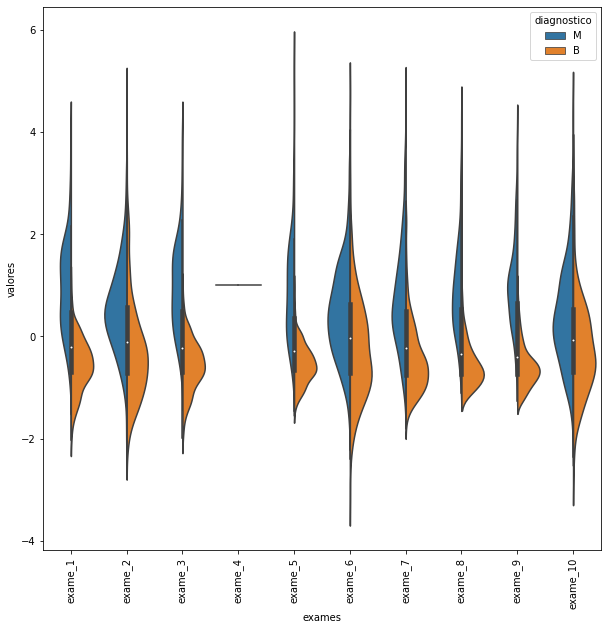

In [5]:
# Vimos que é necessário padronizar os dados do eixo y, pois esta indo de 0 até 2500
# não fica usual para analise, assim utilizaremos a funcao StandardScaler do sklearn
# e posteriormente continuar a visulização
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()

# Treinar os dados para padronização
padronizador.fit(valores_exames_v1)

# Setar os dados treinados em uma nova variavél e transforma-los
valores_exames_v2 = padronizador.transform(valores_exames_v1)

# Necessário tornar o valores_exames_v2 em um DF para pode plotar o gráfico, pois, da forma que está, é um array
valores_exames_v2 = pd.DataFrame(data = valores_exames_v2, columns = valores_exames_v1.keys())

# Gostariamos de visulizar os resultados, com isso, iremos usar o grafico de violino
# porém, os dados não estão na forma desejada para o plot, assim, iremos tratar os dados novamente
# No "dados_plot", faremos a concatenação do DF diagnostico e valores_exames_v1, e no 'iloc'
# queremos todas as linhas, indo da coluna 0 até 10
dados_plot = pd.concat([diagnostico, valores_exames_v2.iloc[:,0:10]], axis = 1)

# Utilizando a função melt do pandas, iremos deixar nosso novo DF de uma outra forma, no caso
# com três colunas, dignostico, exames e valores, assim, fica melhor para o plot

dados_plot = pd.melt(dados_plot, id_vars="diagnostico", 
                 var_name="exames",
                 value_name="valores")

import seaborn as sns
import matplotlib.pyplot as plt

# Tamanho do gráfico
plt.figure(figsize=(10,10))

sns.violinplot(x = "exames", y = "valores", 
               hue = "diagnostico", data = dados_plot, split = True)

# Rotacionar em 90 graus as variaveis do eixo x para ficar legivel
plt.xticks(rotation = 90)

In [6]:
dados_plot.head()

,diagnostico,exames,valores
0,M,exame_1,1.097064
1,M,exame_1,1.829821
2,M,exame_1,1.579888
3,M,exame_1,-0.768909
4,M,exame_1,1.750297


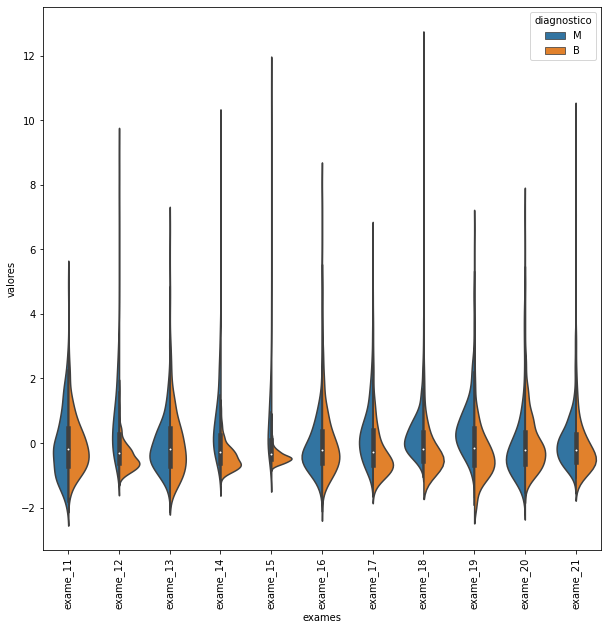

In [7]:
# Como o exame 4 é valores constantes, necessita verificar se nos dados restantes
# há também valores assim, com isso, criaremos uma função para o plot dos valores de 10 até 21, 
# de 21 até 32
def grafico_violino(valores, inicio, fim):

    dados_plot = pd.concat([diagnostico, valores.iloc[:,inicio:fim]], axis = 1)
    dados_plot = pd.melt(dados_plot, id_vars="diagnostico", 
                         var_name="exames",
                         value_name="valores")

    plt.figure(figsize=(10,10))

    sns.violinplot(x = "exames", y = "valores", hue = "diagnostico", 
                    data = dados_plot, split = True)

    plt.xticks(rotation = 90)

grafico_violino(valores_exames_v2, 10, 21)

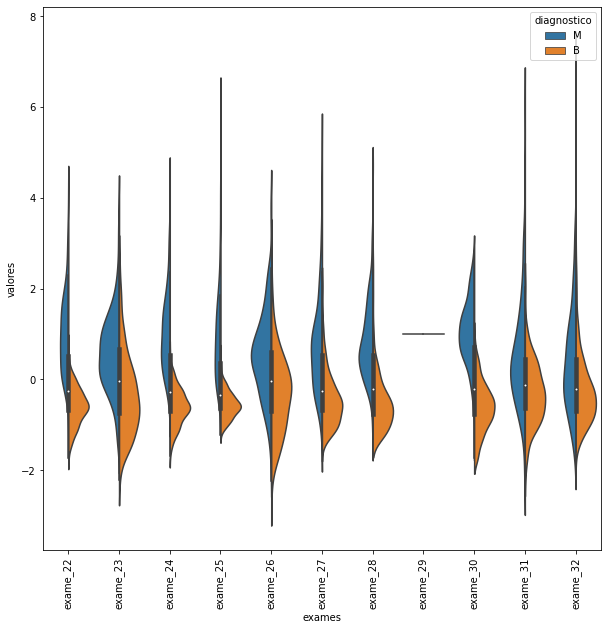

In [8]:
grafico_violino(valores_exames_v2, 21, 32)

In [9]:
# Vimos que exame 4 e exame 29 os valores são constantes, assim, removeremos do nosso DF
# e realizaremos novo treeinamento e teste

valores_exames_v3 = valores_exames_v2.drop(columns = ['exame_4', 'exame_29'])

# Agora criaremos uma função para o treinamento e teste com novos valores
def classificar(valores):
    SEED = 1234
    random.seed(SEED)

    treino_x, teste_x, treino_y, teste_y = train_test_split(valores, diagnostico, test_size = 0.3)

    classificador = RandomForestClassifier(n_estimators = 100)
    classificador.fit(treino_x, treino_y)
    
    print("Resultado da classificação %.2f%%" % (classificador.score(teste_x, teste_y)* 100))
classificar(valores_exames_v3)

Resultado da classificação 92.98%


<AxesSubplot:>

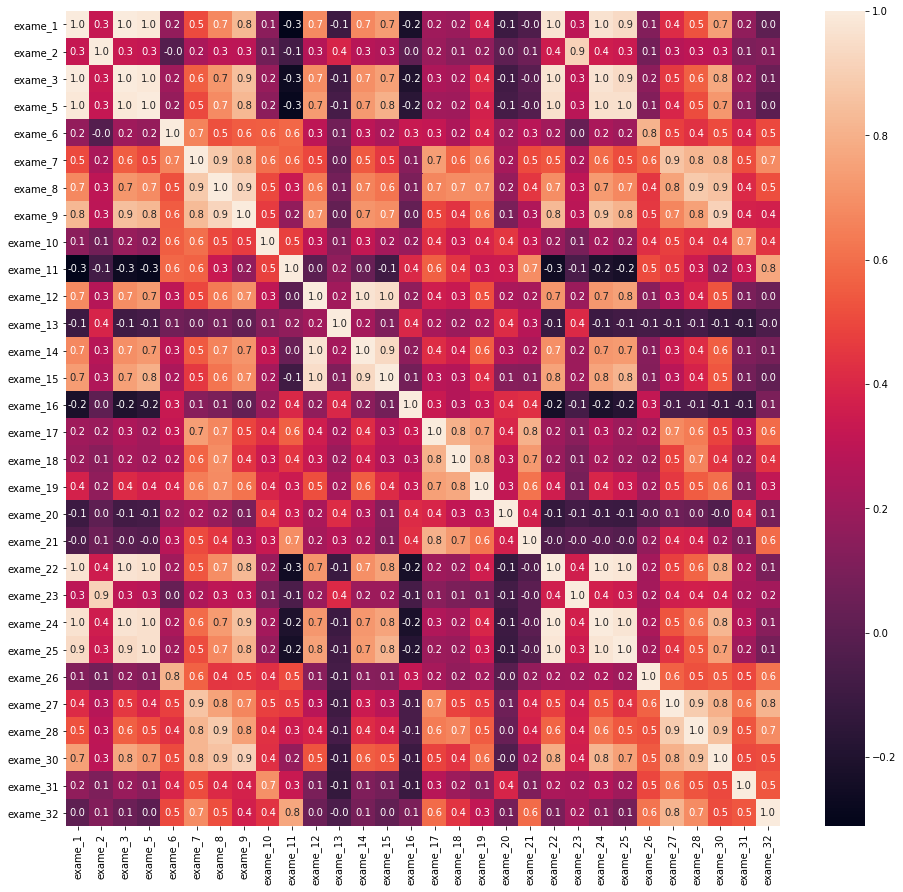

In [10]:
# Correlação dos dados do nosso dataframe valores_exames_v3
# Criaremos uma matriz de correlção e um mapa de calor via Seaborn
# No pandas, há a função .corr() que ja nos retorna as correlações das features do data frame
matriz_correlacao = valores_exames_v3.corr()

# Utilizando o sns.heatmap() para visualizar a correlação
# O plt.figure para estar redmensionado o tamanho da figura
# os parametros "annot = True" é para mostrar os valores da correlação entre cada features
# fmt = ".1f" é para mostrar quantas casa decimais nos valores das correlações
plt.figure(figsize = (16,15)) 
sns.heatmap(matriz_correlacao, annot = True, fmt = '.1f')


In [11]:
# Após analisar o heatmap, vimos que há features altamente correlcianda, sendo a diagnonal principal
# com valores 1, pois sao correlçaões de features com ela mesmo, então, não é tão interessante para analise
# Há também outras features distinstas entre si que são altamente corelacinadas, assim, vamos realizar
# mais filtros no nosso DF
# Criaremos a matriz_correlacao_v1 que ira armazenar o retorno de todas as correlações maiores 0.99
# ou seja, possui correlação quase perfeita
matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao>0.99]
matriz_correlacao_v1

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Fazendo a soma das colunas para verificar se é maior que 1, demosntra quais as features altamente correlacionada
matriz_correlacao_v2 = matriz_correlacao_v1.sum()
matriz_correlacao_v2

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [13]:
# Para saber as variaveis correlacionadas, vamos adicionar essas variaveis
# a variaveis_correlacionadas e identifica-las
variaveis_correlacionadas = matriz_correlacao_v2[matriz_correlacao_v2>1]
variaveis_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [14]:
# Após descobrir as variaveis altamente correlacionada, iremos criar uma nova variavel que recebera
# os valores_de_exames_v3 sem as colunas listadas em variaveis correlacionadas
valores_exames_v4 = valores_exames_v3.drop(columns = variaveis_correlacionadas.keys())
valores_exames_v4.head()

,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,...,exame_20,exame_21,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,...,1.148757,0.907083,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,...,-0.805450,-0.099444,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,...,0.237036,0.293559,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,...,4.732680,2.047511,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,...,-0.361092,0.499328,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [15]:
# Agora, iremos realizar novo treinamento para ver a acurácia do mesmo
# com o novo DF
classificar(valores_exames_v4)

Resultado da classificação 91.81%


In [16]:
# Visto que não é necesário remover todas as variaveis altamente correlacionadas, no caso,
# o exame_1 e exame_3 estão altamente correlacionada ao analisar no heatmap assim como
# o exame_22 e exame_24, assim, removeremos uma feature desse par, sendo o exame_3 e exame_24
valores_exames_v5 = valores_exames_v3.drop(columns = ['exame_3', 'exame_24'])

# Agora, realizar novo treinamento para verificar a acurácia
classificar(valores_exames_v5)

Resultado da classificação 92.98%


In [17]:
# Agora, gostariamos de estar selecionado atraves de uma pontuação
# as melhores features e selecionar as melhores dentre elas
# O SKlearn possui um método SelectKBest() que faz justamente isso: a partir de uma função matemática,
# ele gera um score para cada feature e seleciona um determinado número de features dentre os melhores scores. 
from sklearn.feature_selection import SelectKBest

# Além de um número k de features, precisaremos passar a função matemática que deverá ser utilizada.
# Uma função muito utilizada é o Qui-quadrado, que usaremos para inferir quais features serão mais 
# representativas para nosso processo de classificação.
from sklearn.feature_selection import chi2

# Função chi2 e k=5
selecionar_kmelhores = SelectKBest(chi2, 5)
selecionar_kmelhores

# A função chi2 não aceita numeros negativos, que no caso, quando normalizamos os valores
# houve numeros negativos, assim,temos que voltar no DF antes de normalizar e remover
# as colunas exame_4", "exame_29", "exame_3" e "exame_24".
valores_exames_v6 = valores_exames_v1.drop(columns=["exame_4", "exame_29", "exame_3", "exame_24"])

# Precisamos treinar o nosso modelo e raelizar a transformação dos dados, assim, sendo necessario
# separar novamente os dados em treino e teste no conjunto de valores_exames_v6
SEED = 1234
random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size = 0.3)

# Então, usaremos o fit() para treinarmos o modelo selecionar_kmelhores com os dados treino_x e treino_y.
selecionar_kmelhores.fit(treino_x, treino_y)
treino_kbest = selecionar_kmelhores.transform(treino_x)
teste_kbest = selecionar_kmelhores.transform(teste_x)

# O próximo procedimento será treinarmos nosso modelo com apenas essas cinco features e realizarmos a classificação.
# Para isso, criaremos uma variável classificador() que receberá a configuração de um RandomForestClassifier() com 
# número de estimadores igual a 100 e um random_state igual a 1234.
# Com fit(), treinarmeos nosso classificador utilizando os dados treino_kbest e treino_y.
# Em seguida, imprimiremos na tela o resultado de classificador.score(), passando como parâmetros o teste_kbest e o teste_y.
classificador = RandomForestClassifier(n_estimators = 100, random_state=1234)
classificador.fit(treino_kbest, treino_y)

print("Resultado da classificação %.2f%%" % (classificador.score(teste_kbest, teste_y)* 100))

Resultado da classificação 92.40%


C:\Users\mathe\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass k=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [18]:
# A titulo de analisar melhor os resultados, é interesante utilizar a matriz de confusao
# Podemos analisar isso por meio de uma matriz de confusão, representada no SKlearn pela função confusion_matrix().
# Essa função nos retorna uma matriz na qual os elementos i são os valores reais e os elementos j são os valores de predição.
# Como parâmetros, ela recebe os valores reais (y_true) e os valores preditos (y_pred).
from sklearn.metrics import confusion_matrix

# Importaremos a função confusion_matrix do módulo sklearn.metrics e criaremos uma variável matriz_confusao
# que guardará o retorno da sua chamada. O primeiro parâmetro que passaremos para essa função é o teste_y,
# que compõe os resultados reais.
# Para obtermos as predições, chamaremos classificador.predict() com teste_kbest como parâmetro - afinal, 
# treinamos esse classificador com os dados treino_kbest selecionados pelo modelo select_kbest().
matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_kbest))
matriz_confusao

array([[100,   5],
       [  8,  58]], dtype=int64)

[Text(0.5, 38.5, 'Predição'), Text(56.5, 0.5, 'Real')]

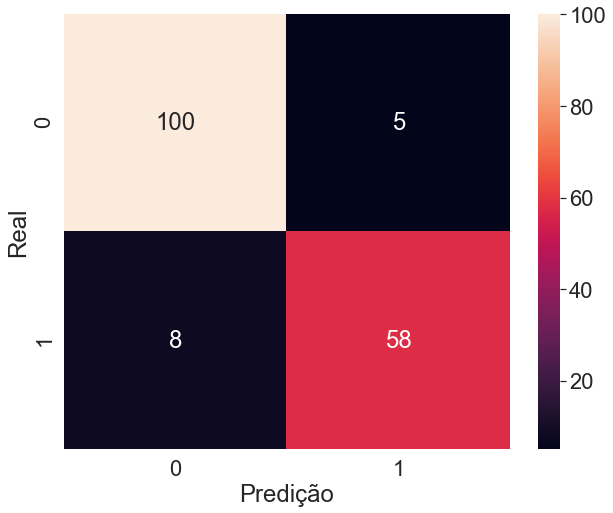

In [19]:
# Para a interpretação melçhor da matriz, iremos representa-la em um heatmap
# Primeiro, chamaremos a função sns.set(), que nos permitirá setar algumas características
# da figura, como o tamanho da fonte (font_scale, que usaremos 2 para melhor leitura).
plt.figure(figsize = (10,8))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')

##### O eixo Y está representando nossos valores reais, e o eixo X representa os valores de predição. Temos 0 quando o diagnóstico é de um câncer benigno e 1 quando é de um câncer maligno. A soma dos dois quadrados superiores nos trará o total de cânceres diagnosticados como benignos, e a dos dois quadrados inferiores o total de cânceres diagnosticados como malignos.

##### De 105 casos benignos, nosso modelo acertou 100, classificando o restante (5) como maligno. Já nos casos de cânceres malignos, nosso modelo acertou 58, classificando 8 como benignos. 

Resultado da classificação 90.06%


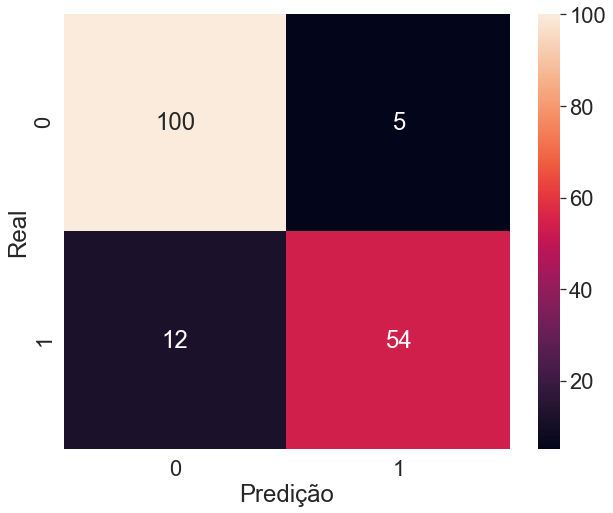

In [20]:
# Nessa nova técnica, por meio da acurácia, que será nossa forma de avaliação, nosso classificador saberá qual das features
# é mais importante pra ele, descartando as de menor acurácia. Esse processo será feito sucessivamente até atingir o número 
# de features selecionado - no no nosso caso, 5. Esse modelo, que implementaremos em Python, 
# é chamado de RFE - Recursive Feature Elimination, algo como "Eliminação de Feature por Recursão".
from sklearn.feature_selection import RFE

SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6,
                                                       diagnostico,
                                                       test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state = 1234)
classificador.fit(treino_x, treino_y)

# Esse método tem como entrada o estimador (estimator),o número de features que queremos selecionar (n_features_to_select), 
# o número de passos que ele dará (step)
# Nosso estimador será o classificador, o número de features será 5 e queremos dar apenas 1 passo.
selecionador_rfe = RFE(estimator = classificador, n_features_to_select = 5, step = 1)

selecionador_rfe.fit(treino_x, treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)
classificador.fit(treino_rfe, treino_y)

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))
plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

print("Resultado da classificação %.2f%%" % (classificador.score(teste_rfe, teste_y)* 100))

Resultado da classificação 92.98%


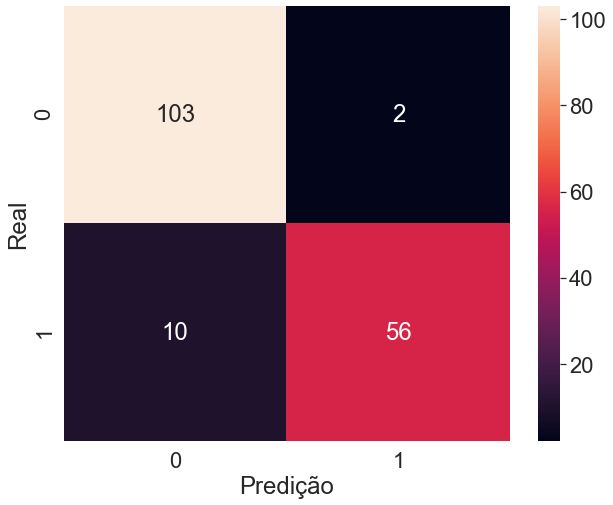

In [21]:
# O RFECV divide o nosso banco de dados em blocos e aplica o algoritmo RFE,
# em cada um desses blocos, gerando diferentes resultados. Dessa forma, O RFECV não só nos informa quantas 
# features precisamos ter para gerar o melhor resultado possível, como também quais features são essas.
from sklearn.feature_selection import RFECV

SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6,
                                                       diagnostico,
                                                       test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state = 1234)
classificador.fit(treino_x, treino_y)

# Criaremos então um selecionador_rfecv que receberá a chamada de RFECV com o mesmo estimador que criamos antes 
# (nosso classificador), o número de divisões que deverão ser feitas na base de dados (cv, que definiremos como 5)
# e uma função de avaliação que deverá ser utilizada (scoring, que definiremos como accuracy). 
# Não precisaremos passar passar um número de features, mas mantaremos o número de passos (step = 1).
selecionador_rfecv = RFECV(estimator = classificador, cv = 5, scoring = "accuracy", step = 1)
selecionador_rfecv.fit(treino_x, treino_y)
treino_rfecv = selecionador_rfecv.transform(treino_x)
teste_rfecv = selecionador_rfecv.transform(teste_x)
classificador.fit(treino_rfecv, treino_y)

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfecv))
plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

print("Resultado da classificação %.2f%%" % (classificador.score(teste_rfecv, teste_y)* 100))

In [22]:
# Se executarmos selecionador_rfecv.n_features_, teremos acesso ao número de features utilizado para chegar a esse resultado
selecionador_rfecv.n_features_

26

In [23]:
# Com selecionador_rfecv.support, teremos como retorno um array mostrando True para todas as features que foram selecionadas. 
selecionador_rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [24]:
# Com treino_x.columns[selecionador_rfecv.support_], conseguiremos comparar esses valores com o nosso conjunto de treino, 
# obtendo como retorno todas as features selecionadas:
treino_x.columns[selecionador_rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_10', 'exame_12', 'exame_13', 'exame_14', 'exame_15',
       'exame_16', 'exame_18', 'exame_19', 'exame_20', 'exame_21', 'exame_22',
       'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30',
       'exame_31', 'exame_32'],
      dtype='object')

In [25]:
# Também podemos utilizar o selecionador_rfecv.grid_scores_ para conseguirmos um score acumulativo para cada uma das features.
selecionador_rfecv.grid_scores_

array([0.86936709, 0.93205696, 0.94727848, 0.94474684, 0.95231013,
       0.94974684, 0.95227848, 0.96234177, 0.94727848, 0.95224684,
       0.95981013, 0.96234177, 0.96484177, 0.96231013, 0.96234177,
       0.96231013, 0.96734177, 0.95731013, 0.96734177, 0.95984177,
       0.95734177, 0.94981013, 0.96484177, 0.95481013, 0.95231013,
       0.96981013, 0.96231013, 0.95984177])

<function matplotlib.pyplot.show(close=None, block=None)>

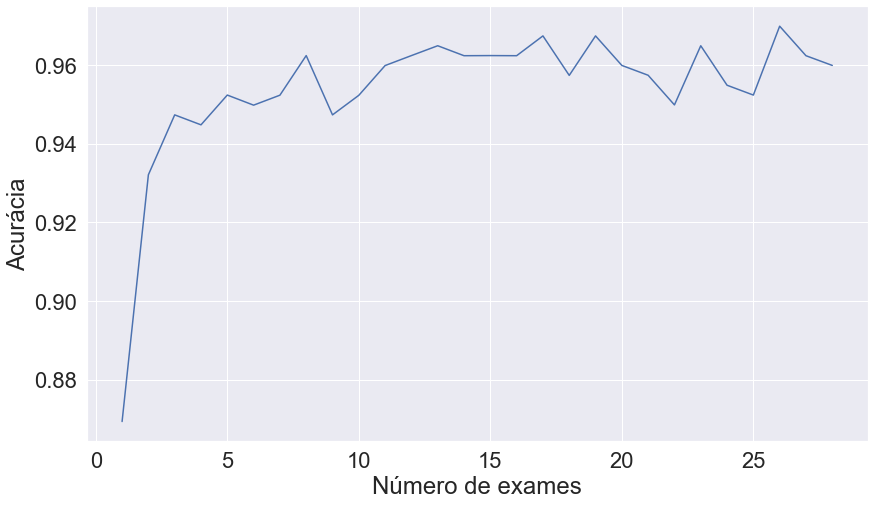

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.xlabel("Número de exames")
plt.ylabel("Acurácia")

plt.plot(range(1, len(selecionador_rfecv.grid_scores_) + 1), selecionador_rfecv.grid_scores_)
plt.show

Resultado da classificação 87.13%


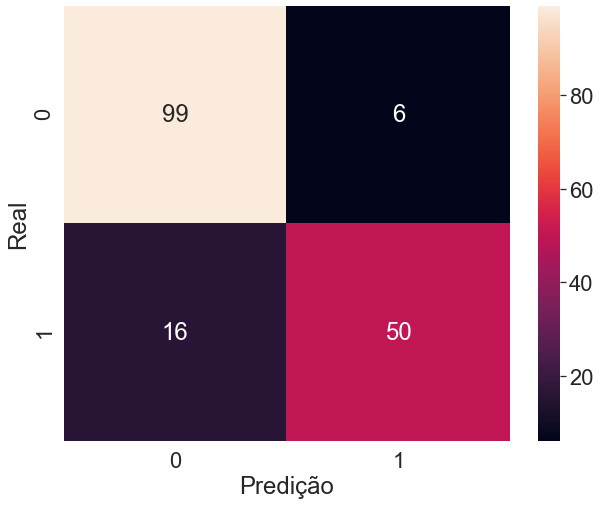

In [27]:
# Por exemplo,temos o dataset resultados_exames e queremos visualizar cada linha em um plano, de forma parecida com um gráfico
# de dispersão, para compararmos entre tipos de cânceres malignos e benignos. Para isso, podemos pegar um dos métodos de 
# seleção de features, modificar o número de seleções para 2, resultando em duas dimensões de dados, e plotar os resultados 
# em um plano.
from sklearn.feature_selection import RFE

SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6,
                                                       diagnostico,
                                                       test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state = 1234)
classificador.fit(treino_x, treino_y)


selecionador_rfe = RFE(estimator = classificador, n_features_to_select = 2, step = 1)
selecionador_rfe.fit(treino_x, treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)
classificador.fit(treino_rfe, treino_y)

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))
plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

print("Resultado da classificação %.2f%%" % (classificador.score(teste_rfe, teste_y)* 100))

In [28]:
# Em seguida, usaremos criaremos uma nova variável valores_exames_v7 que receberá o transform() de valores_exames_v6. 
# Em seguida, executaremos valores_exames_v7 para analisarmos o conjunto obtido.
valores_exames_v7 = selecionador_rfe.transform(valores_exames_v6)
valores_exames_v7.shape

(569, 2)

<AxesSubplot:>

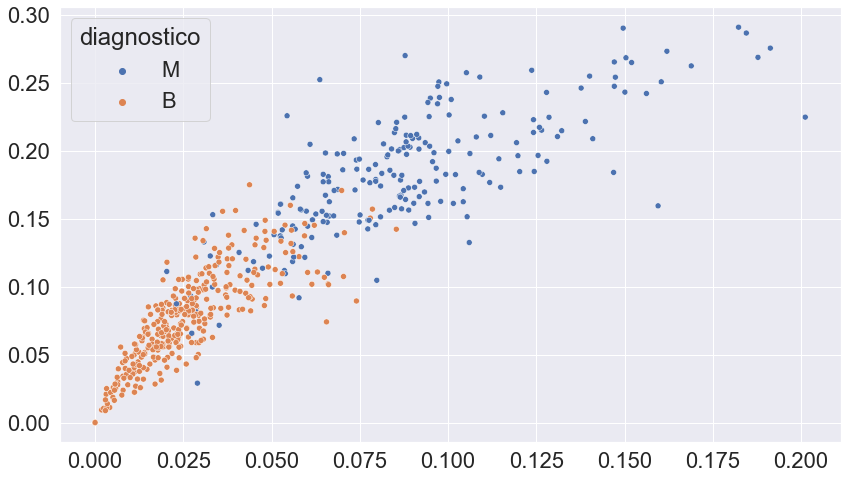

In [29]:
# Importaremos o seaborn como sns e chamaremos a função sns.scatterplot(), passando um eixo x, contendo a primeira coluna 
# do array valores_exames_v7 ([:,0]); um eixo y, contendo a segunda coluna ([:,1]); e um hue, que será o nosso diagnostico.
# Setaremos o tamanho da figura como 14 x 8 e geraremos o gráfico.
import seaborn as sns 

plt.figure(figsize=(14, 8))
sns.scatterplot(x = valores_exames_v7[:,0], y = valores_exames_v7[:,1], hue = diagnostico)

<AxesSubplot:>

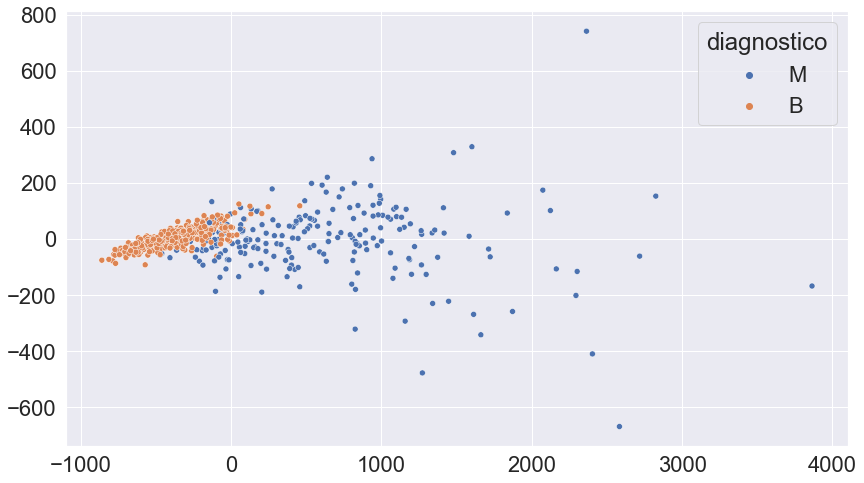

In [30]:
# Uma das técnicas que podemos utilizar para manter o máximo de informações possível em dimensionalidades reduzidas é o PCA.
# O PCA opera uma transformação matemática sobre os dados, na qual as primeiras dimensões serão as variáveis que manterão 
# o maior volume possível de informação.
from sklearn.decomposition import PCA

# O n_components é o número de variáveis que queremos ter como retorno - no caso, 2.
pca = PCA(n_components = 2)
valores_exames_v8 = pca.fit_transform(valores_exames_v6)

plt.figure(figsize=(14, 8))
sns.scatterplot(x = valores_exames_v8[:,0], y = valores_exames_v8[:,1], hue = diagnostico)

<AxesSubplot:>

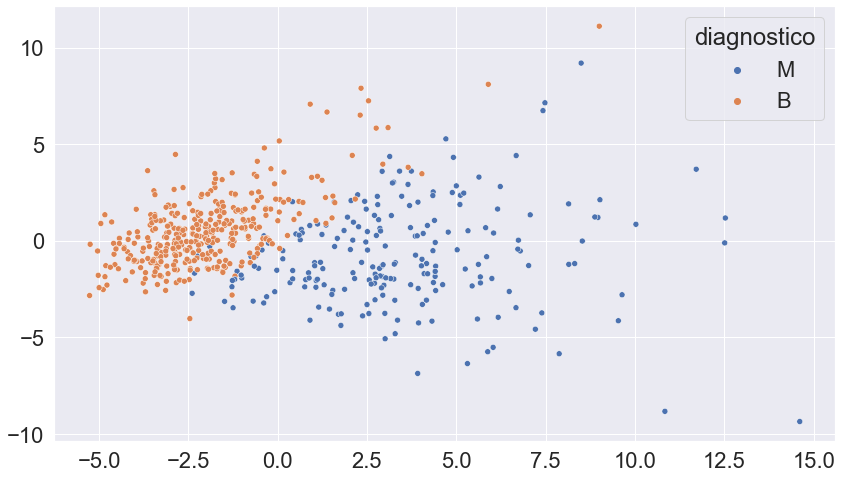

In [31]:
# O PCA realizou a transformação, mas ainda não temos uma visualização que pode ser analisada em detalhes. 
# Isso porque valores_exames_v6 utiliza a nossa base de dados original, sem uma padronização dos valores, 
# e o PCA se comporta melhor com os dados já normalizados. Sendo assim, ao invés de aplicarmos a transformação 
# em valores_exames_v6, aplicaremos em valores_exames_v5.
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
valores_exames_v8 = pca.fit_transform(valores_exames_v5)

plt.figure(figsize=(14, 8))
sns.scatterplot(x = valores_exames_v8[:,0], y = valores_exames_v8[:,1], hue = diagnostico)

<AxesSubplot:>

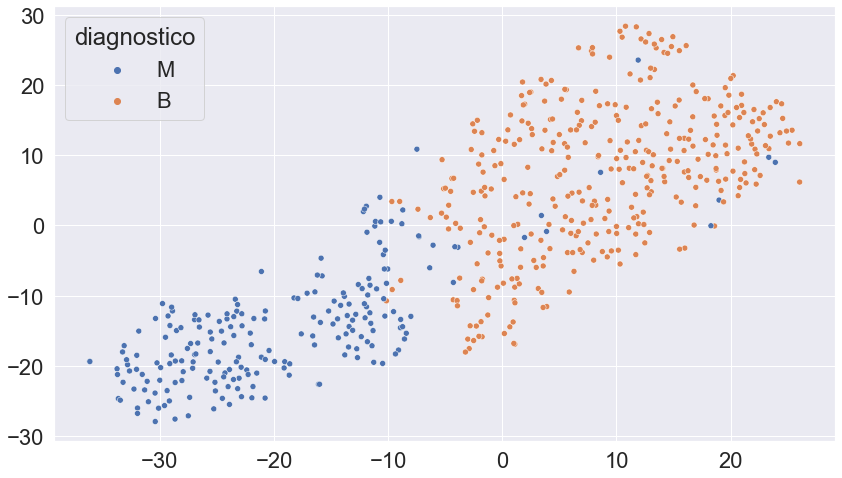

In [35]:
# Ainda existe uma técnica que se comporta melhor quando queremos gerar visualizações, chamada t-SNE, que também está 
# presente no SKlearn. De maneira resumida, a t-SNE tenta manter as distâncias entre os pontos.
# Por exemplo, se calcularmos a distância entre o ponto 0 e o ponto 1, teremos um valor em 28 dimensões, 
# que é a quantidade de features do nosso conjunto. O t-SNE tenta manter a proporção dessas distâncias na redução 
# para dimensões menores, permitindo que tenhamos uma noção de quão distante um ponto está do outro.
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2)
valores_exames_v9 = tsne.fit_transform(valores_exames_v5)

plt.figure(figsize=(14, 8))
sns.scatterplot(x = valores_exames_v9[:,0], y = valores_exames_v9[:,1], hue = diagnostico)